## This notebook contains all the code necessary to recreate Figure 1

In [1]:
# import necessary libraries and define function
import os 
import netCDF4 
import numpy as np
%matplotlib inline   
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.colors as colors  
from matplotlib.colors import BoundaryNorm 
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import xarray as xr
import numpy as np

# Define the path to the datasets that store the figure data
stem = "../Data/"

# This cell is used to recreate Figure 1a. 
The data is saved in a nc file called Figure1a_data.nc

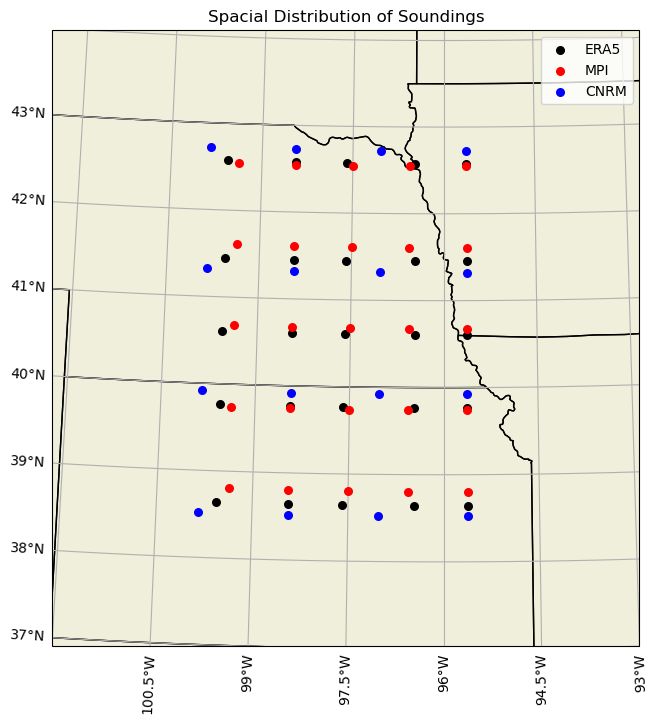

In [2]:

# Load the dataset
ds = xr.open_dataset(f"{stem}/Figure1a_data.nc")

# Extract the variables
ERA5_lon_lat = ds['ERA5_unique_lon_lat'].values
MPI_lon_lat = ds['MPI_unique_lon_lat'].values
CNRM_lon_lat = ds['CNRM_unique_lon_lat'].values

ERA5_lon = ERA5_lon_lat[:, 0]
ERA5_lat = ERA5_lon_lat[:, 1]
MPI_lon = MPI_lon_lat[:, 0]
MPI_lat = MPI_lon_lat[:, 1]
CNRM_lon = CNRM_lon_lat[:, 0]
CNRM_lat = CNRM_lon_lat[:, 1]

# Set up the map projection and figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5))

# Adjust the extent to cover the area between 102 to 94 W and 36 to 44 N
ax.set_extent([-102, -93, 37, 44], crs=ccrs.PlateCarree())

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='black')

# Plot the latitude and longitude points
ax.scatter(ERA5_lon, ERA5_lat, transform=ccrs.PlateCarree(), color='k', marker='o', s=30, zorder=3, label='ERA5')
ax.scatter(MPI_lon, MPI_lat, transform=ccrs.PlateCarree(), color='r', marker='o', s=30, zorder=3, label='MPI')
ax.scatter(CNRM_lon, CNRM_lat, transform=ccrs.PlateCarree(), color='b', marker='o', s=30, zorder=3, label='CNRM')

# Add gridlines and labels, disabling top and right labels
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

plt.title('Spacial Distribution of Soundings')
plt.legend()
plt.show()

# The following cell defines functions and variables for figures 1b-f. 


In [11]:
# define function and shared variables

# This function customizes a given colormap by inserting a white segment in the middle
def cmap_midwhite(N_colors,colormap):
    cmap = plt.cm.get_cmap(colormap)
    cmaplist = [cmap(i) for i in range(cmap.N)]
    nclrs0 = len(cmaplist)
    deltn_clr = nclrs0/N_colors
    i_white0 = np.int16(np.round(nclrs0/2-deltn_clr))
    i_whitef = np.int16(np.round(nclrs0/2+deltn_clr))
    if (i_whitef-i_white0)>(2.*deltn_clr):
        i_white0 = i_white0+1
        i_whitef = i_whitef-2
    i_white_vec = np.arange(i_white0,i_whitef+1,1)
    for i_white in i_white_vec:
        cmaplist[i_white] = (1.,1.,1.,1.)
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
    cmap.set_over(cmaplist[-1])
    cmap.set_under(cmaplist[0])
    return cmap

#shared parameters 
year0          = 1980
yearf          = 2014
months         = np.arange(3,9+1)  
grid_cape      = np.arange(0,9900,100)
grid_s06       = np.arange(0,99,1)   
xlabel         = 'CAPE (J kg$^{-1}$)'
ylabel         = 'S06 (m s$^{-1}$)'   
era5           = np.zeros((len(grid_s06),len(grid_cape))) 
mpi_hist       = np.zeros((len(grid_s06),len(grid_cape))) 
mpi_ssp        = np.zeros((len(grid_s06),len(grid_cape))) 
cnrm_hist      = np.zeros((len(grid_s06),len(grid_cape))) 
cnrm_ssp       = np.zeros((len(grid_s06),len(grid_cape)))
for month in months:
    #
    year0      = 1980;            yearf= 2014
    datadir_in = '../Data/Fig_1/ERA5/ml' 
    datapath_in= '%s/ERA5_jointpdf_%04d-%04d_%02d.nc'%(datadir_in,year0,yearf,month)
    print(datapath_in)
    f          = netCDF4.Dataset(datapath_in) 
    era5       = era5+ np.asarray(f.variables['ndsevcin']) 
    #
    year0      = 1980;            yearf= 2014
    model      = 'MPI-ESM1-2-HR'; sim  = 'historical'; ens  = 'r1i1p1f1'
    datadir_in = '../Data/Fig_1/%s/%s'%(model,sim) 
    datapath_in= '%s/%s_%s_%s_jointpdf_%04d-%04d_%02d.nc'%(datadir_in,model,sim,ens,year0,yearf,month)
    print(datapath_in)
    f          = netCDF4.Dataset(datapath_in) 
    mpi_hist   = mpi_hist+ np.asarray(f.variables['ndsevcin'])
    #
    year0      = 2065;            yearf= 2099
    model      = 'MPI-ESM1-2-HR'; sim  = 'ssp370'; ens  = 'r1i1p1f1'
    datadir_in = '../Data/Fig_1/%s/%s'%(model,sim) 
    datapath_in= '%s/%s_%s_%s_jointpdf_%04d-%04d_%02d.nc'%(datadir_in,model,sim,ens,year0,yearf,month)
    print(datapath_in)
    f          = netCDF4.Dataset(datapath_in) 
    mpi_ssp    = mpi_ssp+ np.asarray(f.variables['ndsevcin'])
    #
    year0      = 1980;            yearf= 2014
    model      = 'CNRM-ESM2-1'; sim  = 'historical'; ens  = 'r1i1p1f2'
    datadir_in = '../Data/Fig_1/%s/%s'%(model,sim) 
    datapath_in= '%s/%s_%s_%s_jointpdf_%04d-%04d_%02d.nc'%(datadir_in,model,sim,ens,year0,yearf,month)
    print(datapath_in)
    f          = netCDF4.Dataset(datapath_in) 
    cnrm_hist  = cnrm_hist+ np.asarray(f.variables['ndsevcin'])
    #
    year0      = 2065;            yearf= 2099
    model      = 'CNRM-ESM2-1'; sim  = 'ssp370'; ens  = 'r1i1p1f2'
    datadir_in = '../Data/Fig_1/%s/%s'%(model,sim) 
    datapath_in= '%s/%s_%s_%s_jointpdf_%04d-%04d_%02d.nc'%(datadir_in,model,sim,ens,year0,yearf,month)
    print(datapath_in)
    f          = netCDF4.Dataset(datapath_in) 
    cnrm_ssp   = cnrm_ssp+ np.asarray(f.variables['ndsevcin'])


../Data/Fig_1/ERA5/ml/ERA5_jointpdf_1980-2014_03.nc
../Data/Fig_1/MPI-ESM1-2-HR/historical/MPI-ESM1-2-HR_historical_r1i1p1f1_jointpdf_1980-2014_03.nc
../Data/Fig_1/MPI-ESM1-2-HR/ssp370/MPI-ESM1-2-HR_ssp370_r1i1p1f1_jointpdf_2065-2099_03.nc
../Data/Fig_1/CNRM-ESM2-1/historical/CNRM-ESM2-1_historical_r1i1p1f2_jointpdf_1980-2014_03.nc
../Data/Fig_1/CNRM-ESM2-1/ssp370/CNRM-ESM2-1_ssp370_r1i1p1f2_jointpdf_2065-2099_03.nc
../Data/Fig_1/ERA5/ml/ERA5_jointpdf_1980-2014_04.nc
../Data/Fig_1/MPI-ESM1-2-HR/historical/MPI-ESM1-2-HR_historical_r1i1p1f1_jointpdf_1980-2014_04.nc
../Data/Fig_1/MPI-ESM1-2-HR/ssp370/MPI-ESM1-2-HR_ssp370_r1i1p1f1_jointpdf_2065-2099_04.nc
../Data/Fig_1/CNRM-ESM2-1/historical/CNRM-ESM2-1_historical_r1i1p1f2_jointpdf_1980-2014_04.nc
../Data/Fig_1/CNRM-ESM2-1/ssp370/CNRM-ESM2-1_ssp370_r1i1p1f2_jointpdf_2065-2099_04.nc
../Data/Fig_1/ERA5/ml/ERA5_jointpdf_1980-2014_05.nc
../Data/Fig_1/MPI-ESM1-2-HR/historical/MPI-ESM1-2-HR_historical_r1i1p1f1_jointpdf_1980-2014_05.nc
../Data/Fi

# This cell is used to recreate Figure 7b. 
The data is saved in a folder called Fig_1

Text(0.5, 1.0, 'Joint Histogram of CAPE and S06 (ERA5)')

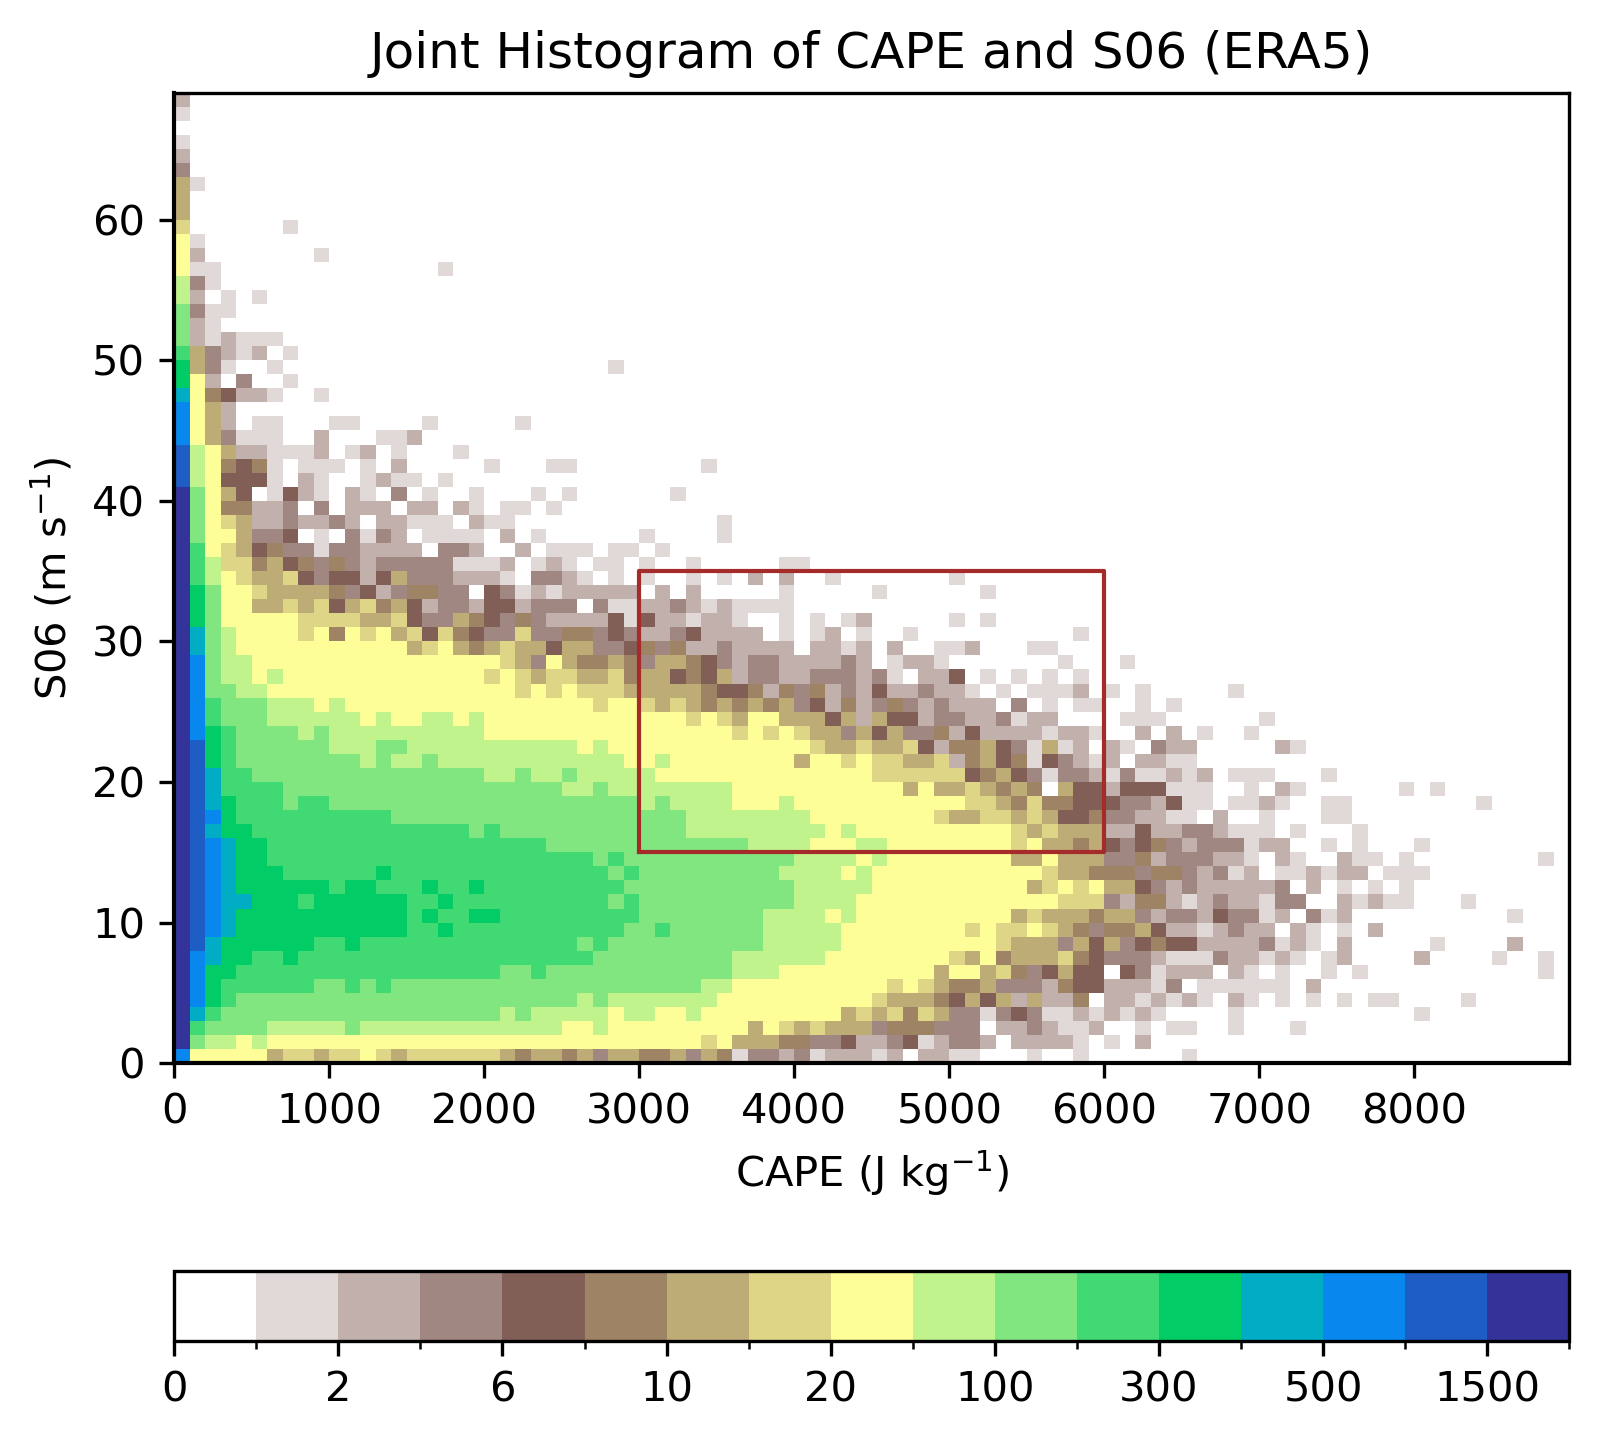

In [12]:
# Create a figure with specific size, layout, and resolution
fig = plt.figure(figsize=[6, 6], constrained_layout=False, dpi=300)
ax = fig.add_subplot(111)  # Add a subplot to the figure

# Generate a meshgrid for plotting, based on grid values for CAPE and S06
x, y = np.meshgrid(grid_cape, grid_s06)

# Define contour levels for the plot
levels = np.asarray([0, 1, 2, 4, 6, 8, 10, 15, 20, 60, 100, 200, 300, 400, 500, 1000, 1500, 2000])

# Choose a colormap and create a norm based on defined levels
cmap = plt.cm.terrain_r
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Plot the joint PDF as a colored mesh
cs = ax.pcolormesh(x, y, era5[:-1, :-1], shading='flat', cmap=cmap, norm=norm)

# Set the labels for x and y axes with specified font size
ax.set_xlabel('%s' % (xlabel), fontsize=10)
ax.set_ylabel('%s' % (ylabel), fontsize=10)

# Add a colorbar to the figure for the mesh plot
cb = fig.colorbar(cs, orientation="horizontal", extend='neither')
cb.ax.tick_params(labelsize=10)  # Set colorbar tick label size

# Set tick label size for the axes
ax.tick_params(labelsize=10)

# Customize the appearance of the axes spines
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)

# Set the limits for the x and y axes
ax.set_xlim(0, 8999)
ax.set_ylim(0, 69)

# Plot a box with specified coordinates and properties
xs = [3000, 3000, 6000, 6000, 3000]  # X coordinates for the box
ys = [15, 35, 35, 15, 15]  # Y coordinates for the box
ax.plot(xs, ys, color="brown", linewidth=1)  # Draw the box

plt.title("Joint Histogram of CAPE and S06 (ERA5)")

# This cell is used to recreate Figure 7c. 
The data is saved in a folder called Fig_1

Text(0.5, 1.0, 'Joint Histogram of CAPE and S06 (MPI Hitstorical)')

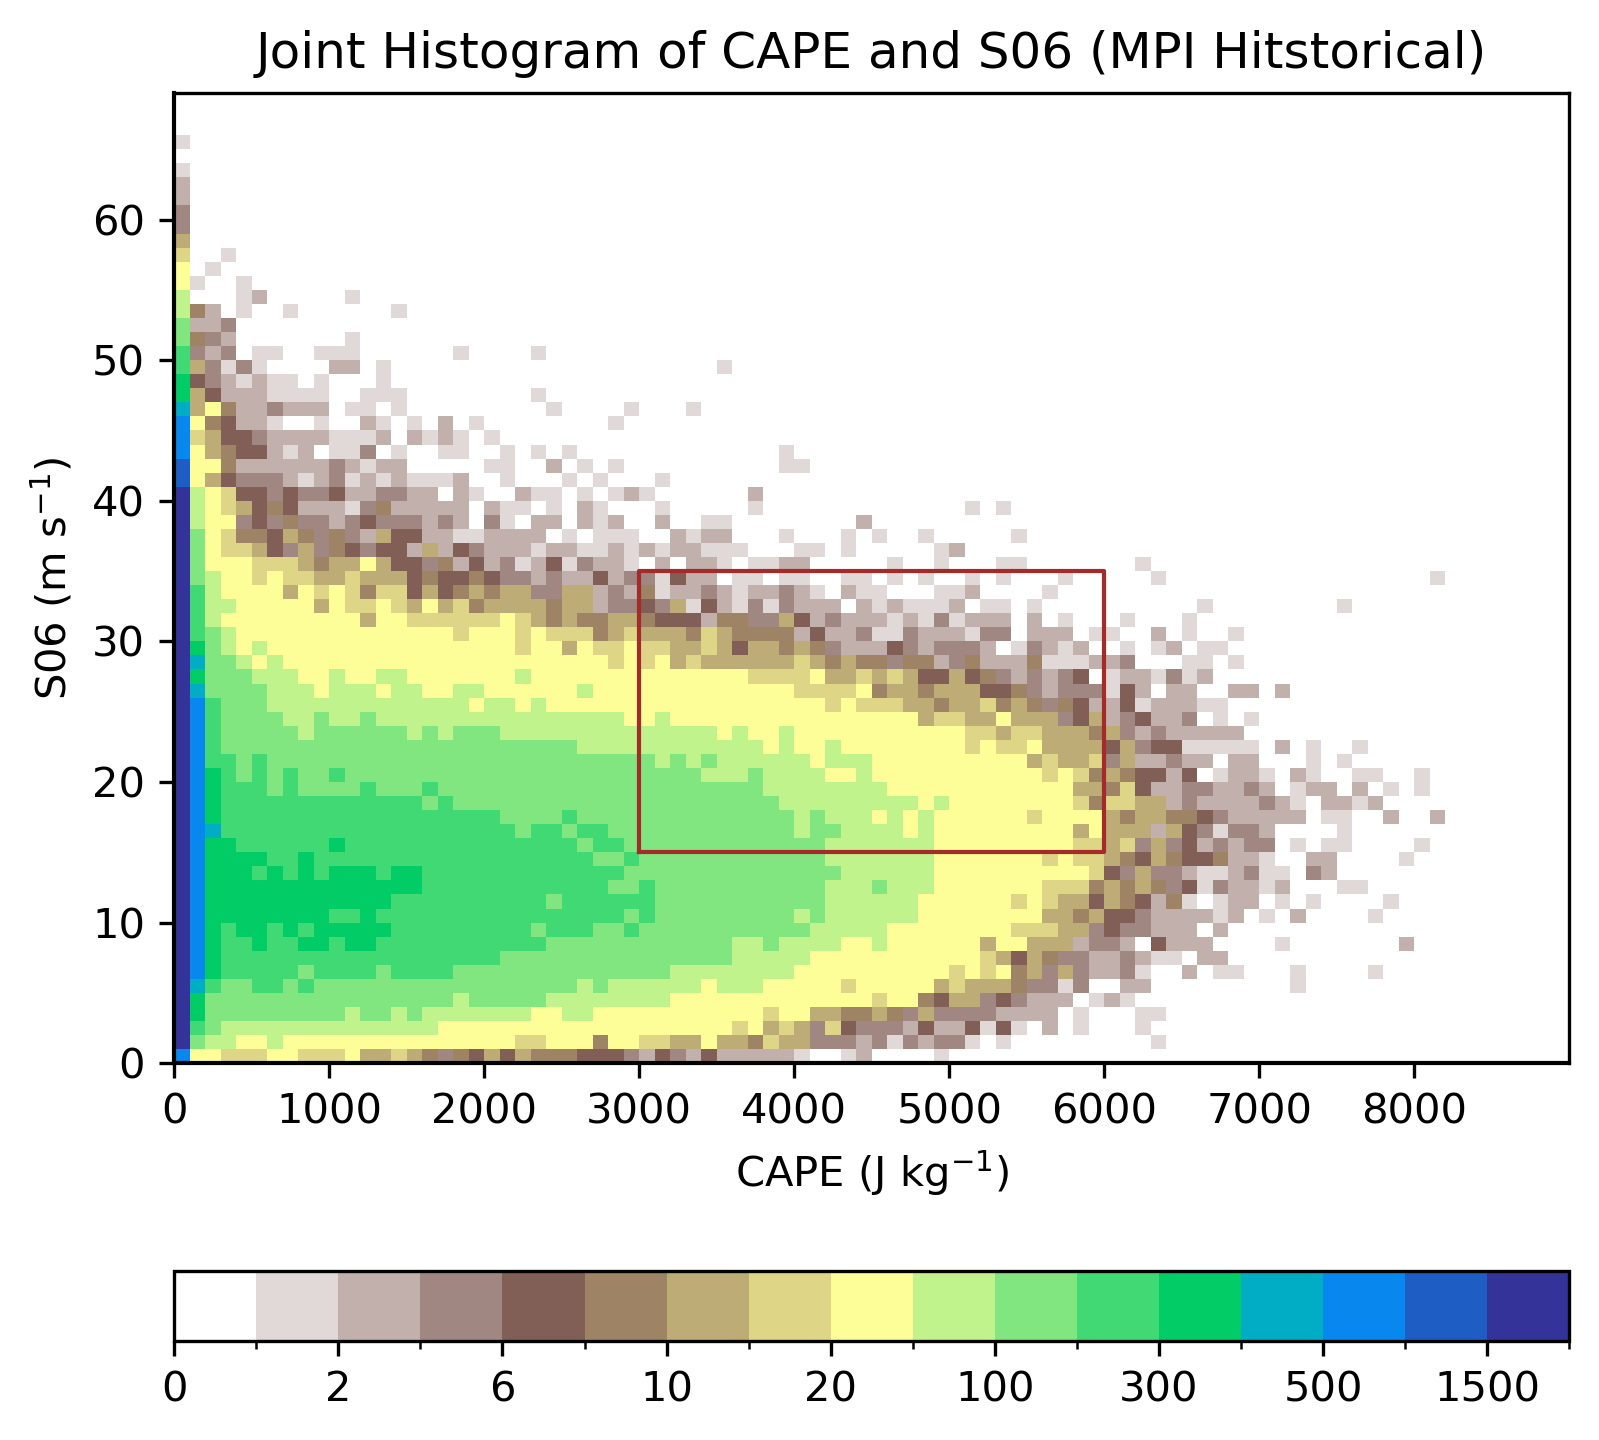

In [13]:
# Create a figure with a specific size, layout, and resolution
fig = plt.figure(figsize=[6, 6], constrained_layout=False, dpi=300)
ax = fig.add_subplot(111)  # Add a subplot to the figure

# Generate a meshgrid for plotting, based on grid values for CAPE and S06
x, y = np.meshgrid(grid_cape, grid_s06)

# Define contour levels for the plot
levels = np.asarray([0, 1, 2, 4, 6, 8, 10, 15, 20, 60, 100, 200, 300, 400, 500, 1000, 1500, 2000])

# Choose a colormap and create a norm based on defined levels
cmap = plt.cm.terrain_r
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Plot the joint PDF as a colored mesh
cs = ax.pcolormesh(x, y, mpi_hist[:-1, :-1], shading='flat', cmap=cmap, norm=norm)

# Set the labels for x and y axes with specified font size
ax.set_xlabel('%s' % (xlabel), fontsize=10)
ax.set_ylabel('%s' % (ylabel), fontsize=10)

# Add a colorbar to the figure for the mesh plot
cb = fig.colorbar(cs, orientation="horizontal", extend='neither')
cb.ax.tick_params(labelsize=10)  # Set colorbar tick label size

# Set tick label size for the axes
ax.tick_params(labelsize=10)

# Customize the appearance of the axes spines
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)

# Set the limits for the x and y axes
ax.set_xlim(0, 8999)
ax.set_ylim(0, 69)

# Plot a box with specified coordinates and properties
xs = [3000, 3000, 6000, 6000, 3000]  # X coordinates for the box
ys = [15, 35, 35, 15, 15]  # Y coordinates for the box
ax.plot(xs, ys, color="brown", linewidth=1)  # Draw the box
plt.title("Joint Histogram of CAPE and S06 (MPI Hitstorical)")


# This cell is used to recreate Figure 7d. 
The data is saved in a folder called Fig_1

Text(0.5, 1.0, 'Joint Histogram of CAPE and S06 (CNRM Historical)')

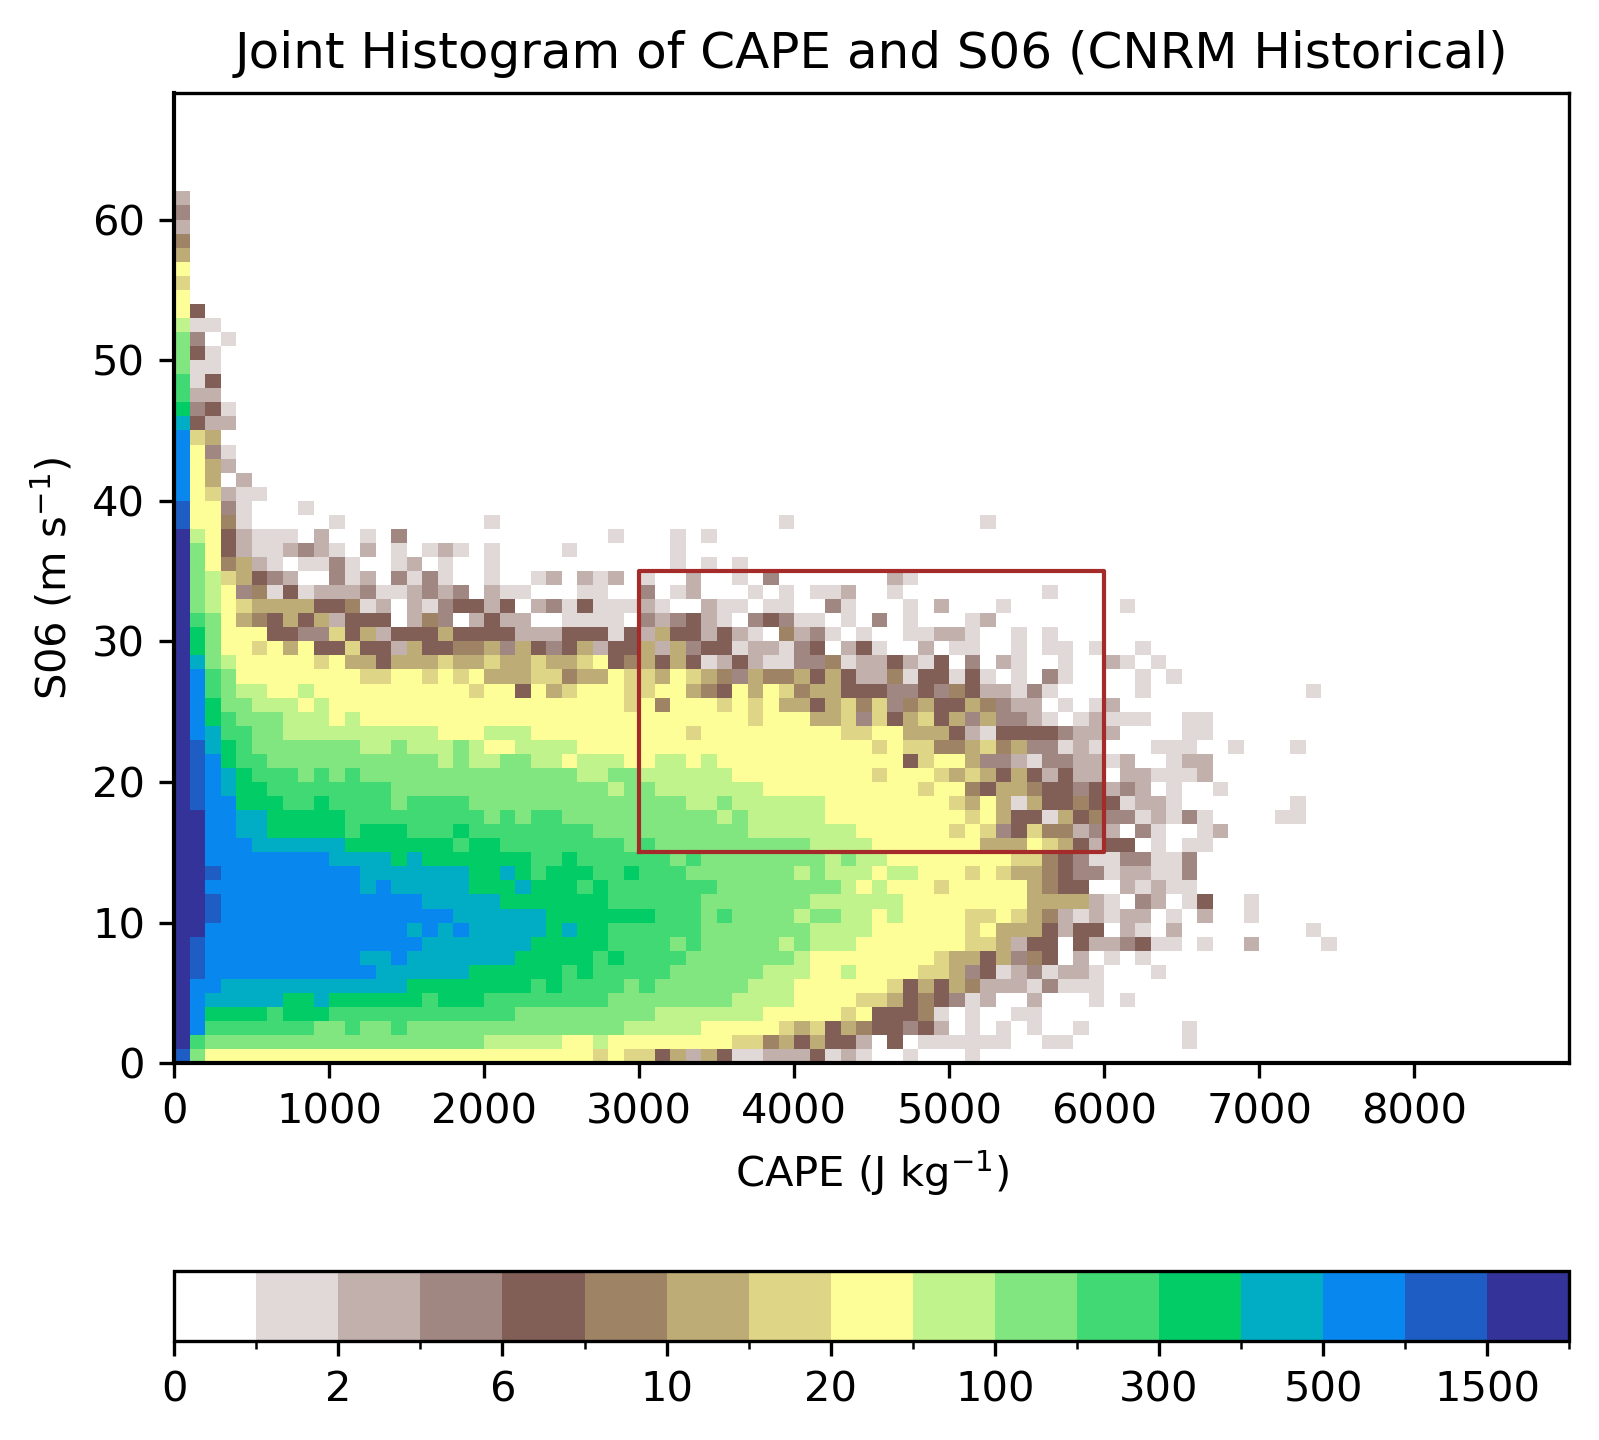

In [14]:
# Initialize a figure with specific dimensions, layout, and resolution
fig = plt.figure(figsize=[6, 6], constrained_layout=False, dpi=300)
ax = fig.add_subplot(111)  # Add a subplot to the figure

# Generate a meshgrid for plotting, based on grid values for CAPE and S06
x, y = np.meshgrid(grid_cape, grid_s06)

# Define contour levels for the plot
levels = np.asarray([0, 1, 2, 4, 6, 8, 10, 15, 20, 60, 100, 200, 300, 400, 500, 1000, 1500, 2000])

# Choose a colormap and create a norm based on defined levels
cmap = plt.cm.terrain_r
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Plot the joint PDF as a colored mesh, adjusting the data with a specific factor
cs = ax.pcolormesh(x, y, cnrm_hist[:-1, :-1] * 25 / 16, shading='flat', cmap=cmap, norm=norm)

# Set the labels for x and y axes with specified font size
ax.set_xlabel('%s' % (xlabel), fontsize=10)
ax.set_ylabel('%s' % (ylabel), fontsize=10)

# Add a colorbar to the figure for the mesh plot
cb = fig.colorbar(cs, orientation="horizontal", extend='neither')
cb.ax.tick_params(labelsize=10)  # Set colorbar tick label size

# Set tick label size for the axes
ax.tick_params(labelsize=10)

# Customize the appearance of the axes spines
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)

# Set the limits for the x and y axes
ax.set_xlim(0, 8999)
ax.set_ylim(0, 69)

# Plot a box with specified coordinates and properties
xs = [3000, 3000, 6000, 6000, 3000]  # X coordinates for the box
ys = [15, 35, 35, 15, 15]  # Y coordinates for the box
ax.plot(xs, ys, color="brown", linewidth=1)  # Draw the box
plt.title("Joint Histogram of CAPE and S06 (CNRM Historical)")

# This cell is used to recreate Figure 7e. 
The data is saved in a folder called Fig_1

/var/folders/nw/q8bqzvts283fpfh4p6bzwhy40000gp/T/ipykernel_39287/2355554269.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap)


Text(0.5, 1.0, 'Future Change in Joint Histogram of CAPE and S06 (MPI)')

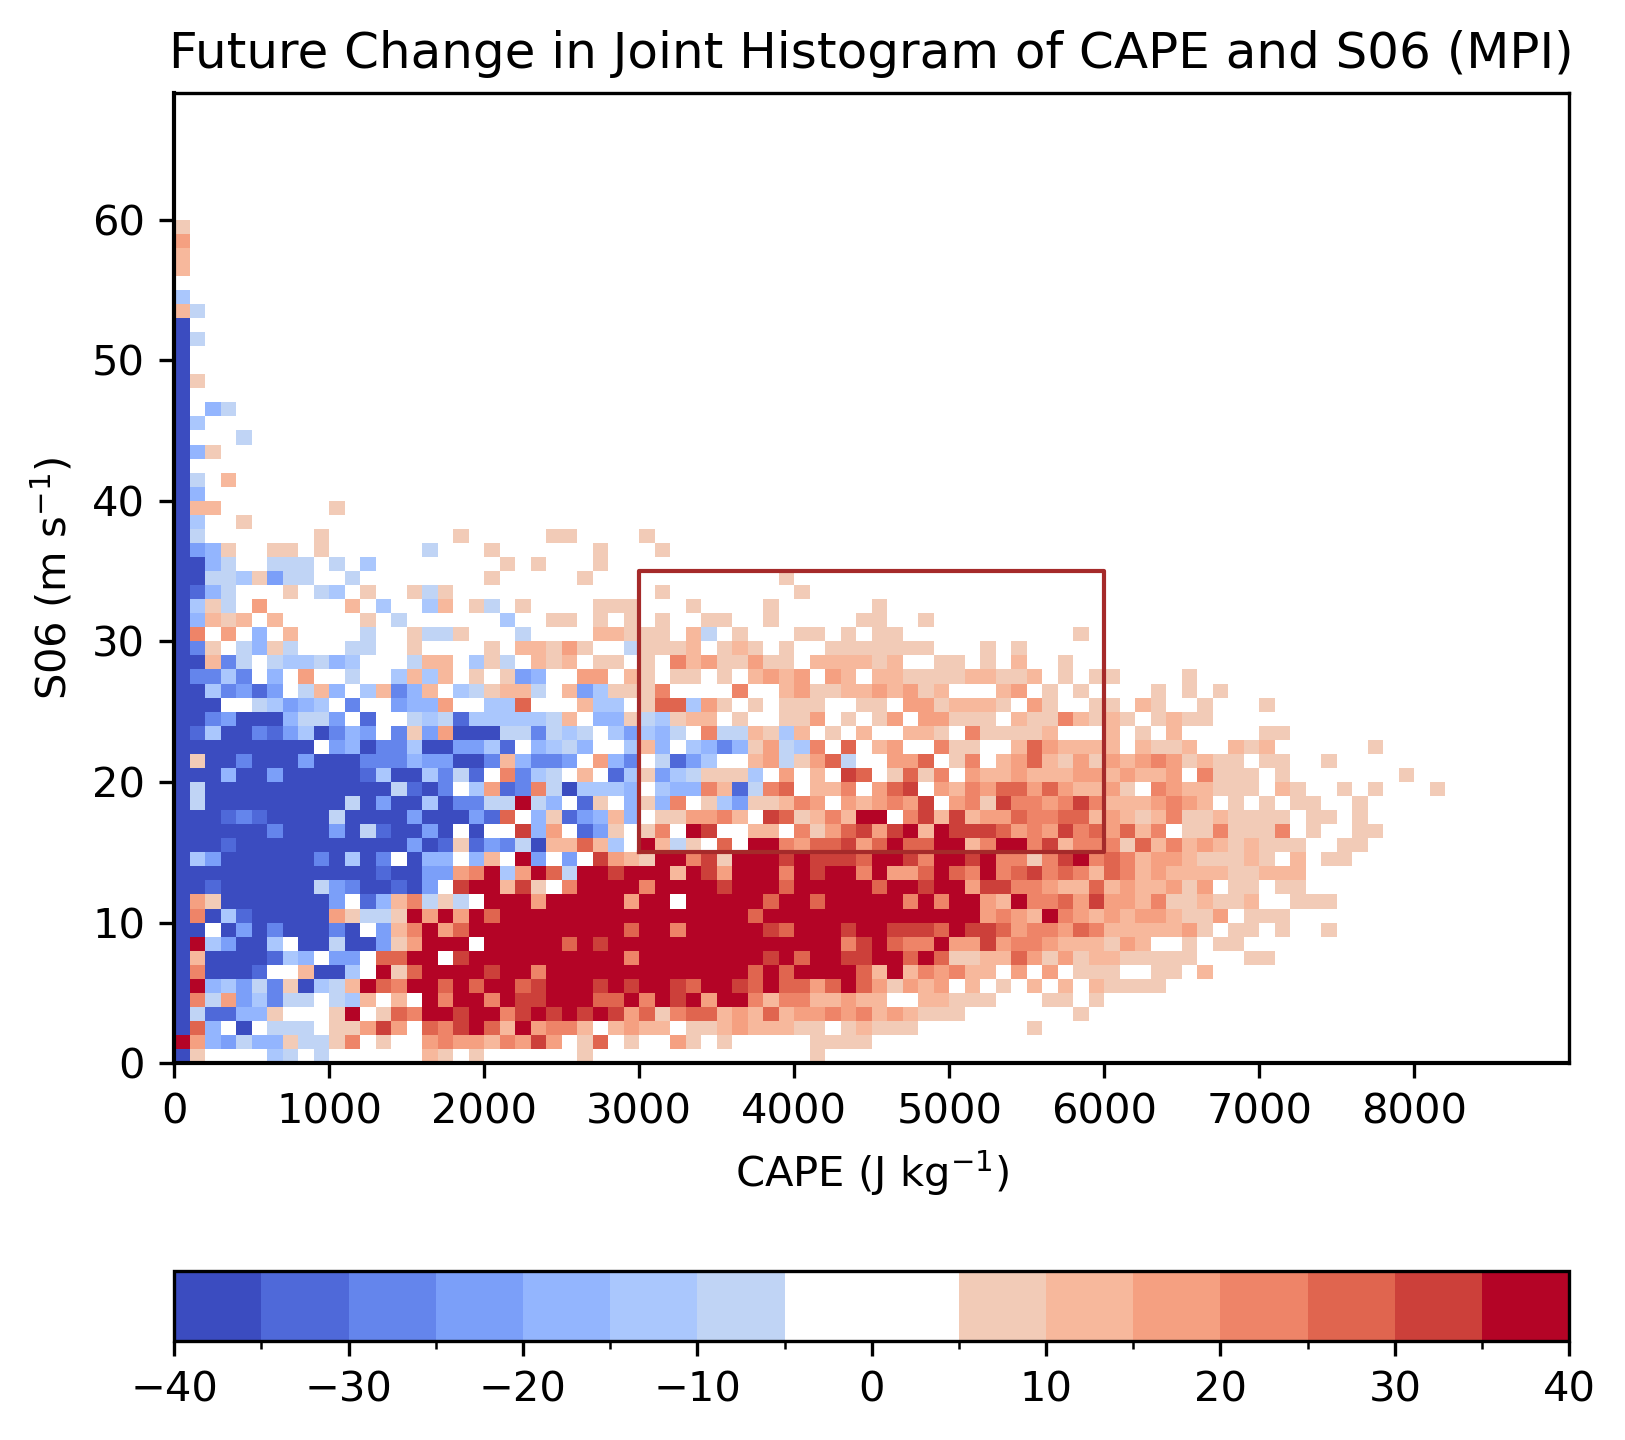

In [15]:
# Initialize a figure with a specific size, layout, and resolution
fig = plt.figure(figsize=[6, 6], constrained_layout=False, dpi=300)
ax = fig.add_subplot(111)  # Add a subplot to the figure

# Generate a meshgrid for plotting, based on grid values for CAPE and S06
x, y = np.meshgrid(grid_cape, grid_s06)

# Define contour levels for the plot
levels = np.asarray([-40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])

# Create a custom colormap with a white segment in the middle for visual emphasis
cmap = cmap_midwhite(len(levels), colormap='coolwarm')

# Create a norm based on defined levels
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Plot the difference between two datasets as a colored mesh
cs = ax.pcolormesh(x, y, mpi_ssp[:-1, :-1] - mpi_hist[:-1, :-1], shading='flat', cmap=cmap, norm=norm)

# Set the labels for x and y axes with specified font size
ax.set_xlabel('%s' % (xlabel), fontsize=10)
ax.set_ylabel('%s' % (ylabel), fontsize=10)

# Add a colorbar to the figure for the mesh plot
cb = fig.colorbar(cs, orientation="horizontal", extend='neither')
cb.ax.tick_params(labelsize=10)  # Set colorbar tick label size

# Set tick label size for the axes
ax.tick_params(labelsize=10)

# Customize the appearance of the axes spines
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)

# Set the limits for the x and y axes
ax.set_xlim(0, 8999)
ax.set_ylim(0, 69)

# Plot a box with specified coordinates and properties
xs = [3000, 3000, 6000, 6000, 3000]  # X coordinates for the box
ys = [15, 35, 35, 15, 15]  # Y coordinates for the box
ax.plot(xs, ys, color="brown", linewidth=1)  # Draw the box

plt.title("Future Change in Joint Histogram of CAPE and S06 (MPI)")

# This cell is used to recreate Figure 7f. 
The data is saved in a folder called Fig_1

/var/folders/nw/q8bqzvts283fpfh4p6bzwhy40000gp/T/ipykernel_39287/2355554269.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap)


Text(0.5, 1.0, 'Future Change in Joint Histogram of CAPE and S06 (CNRM)')

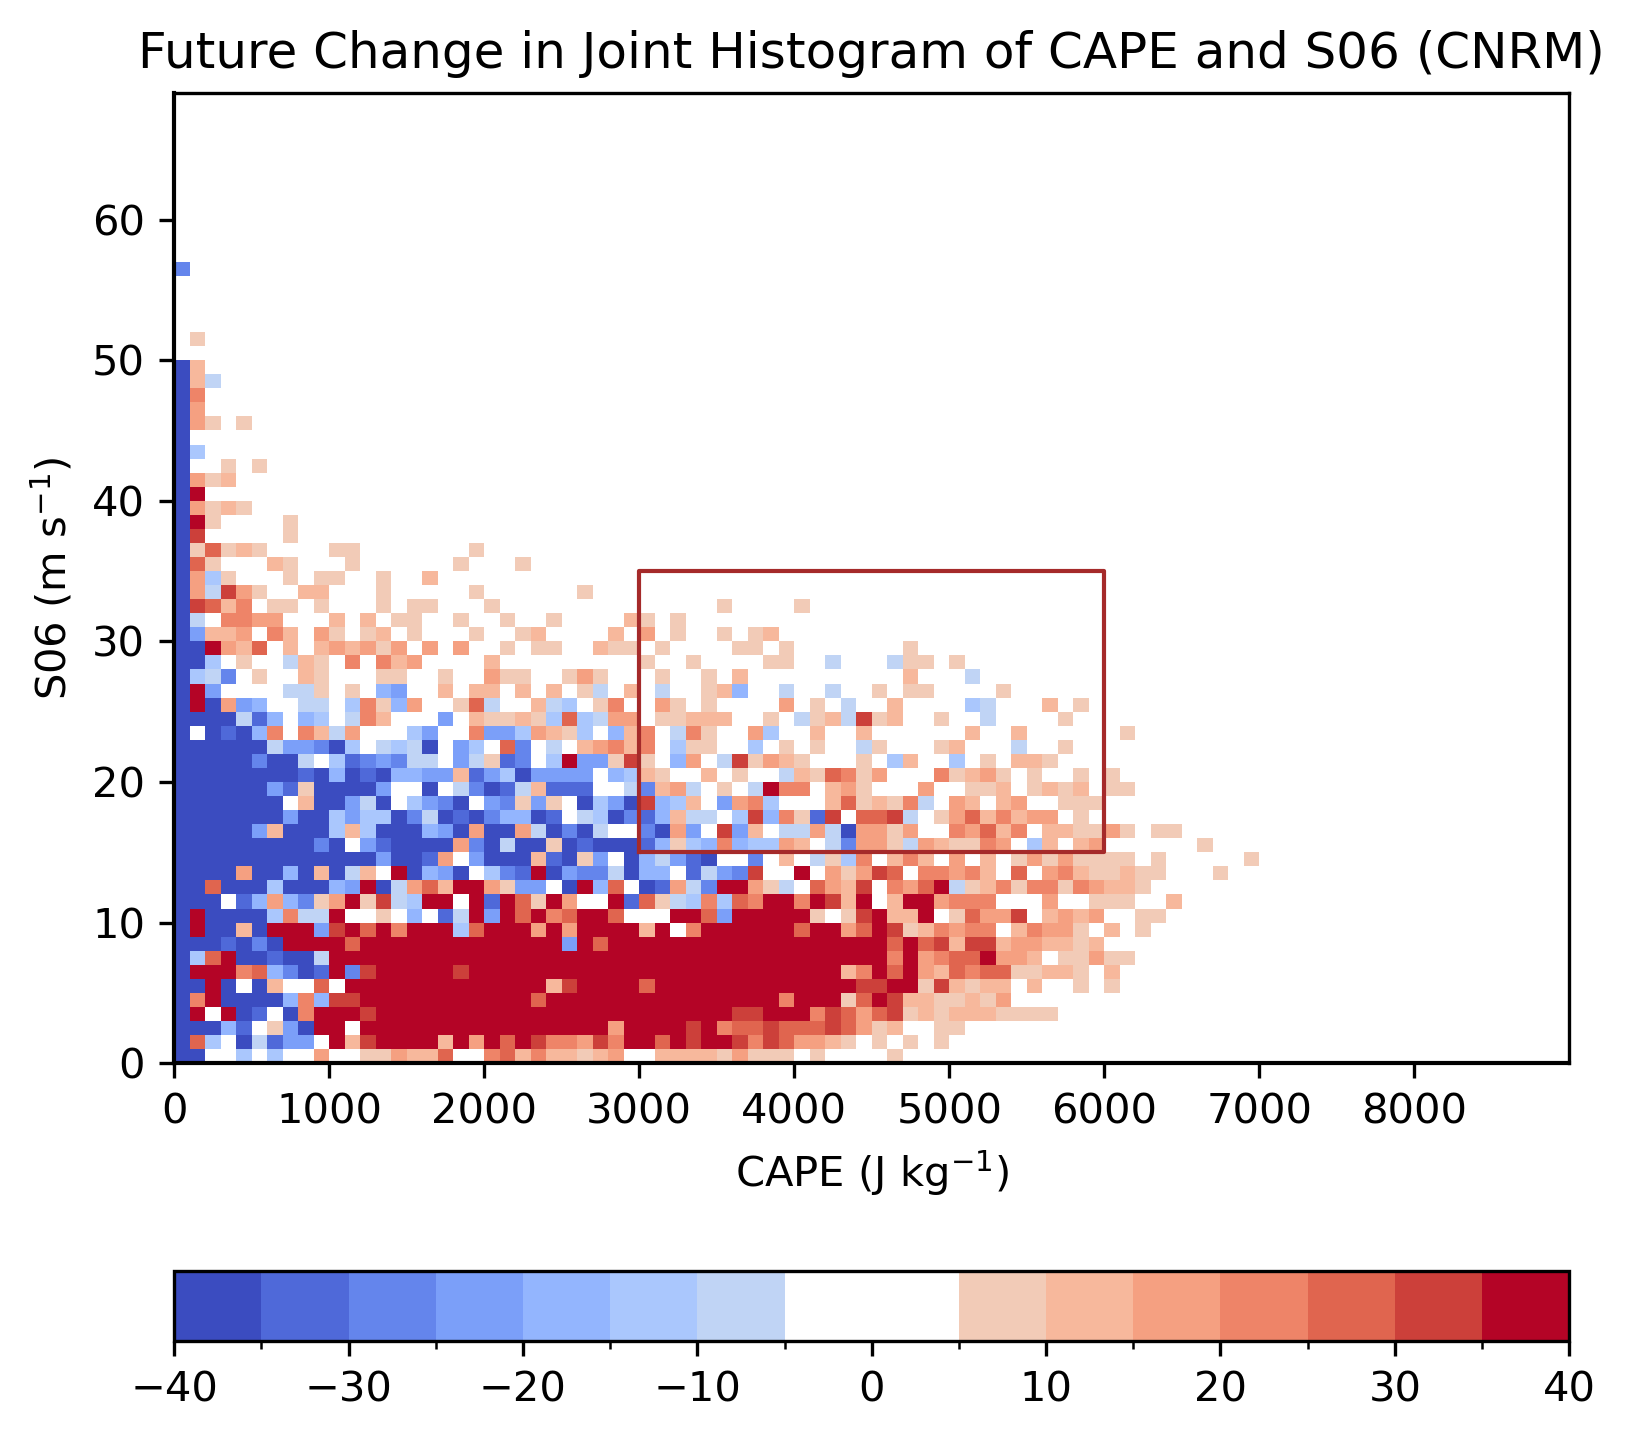

In [16]:
# Initialize figure with specific size, layout, and resolution
fig = plt.figure(figsize=[6, 6], constrained_layout=False, dpi=300)
ax = fig.add_subplot(111)  # Add a subplot to the figure

# Generate a meshgrid for plotting based on grid values for CAPE and S06
x, y = np.meshgrid(grid_cape, grid_s06)

# Define contour levels for the plot
levels = np.asarray([-40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])

# Create a custom colormap with a white segment in the middle
cmap = cmap_midwhite(len(levels), colormap='coolwarm')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Plot the difference between two datasets as a colored mesh
cs = ax.pcolormesh(x, y, (cnrm_ssp[:-1, :-1] - cnrm_hist[:-1, :-1]) * 25 / 16, shading='flat', cmap=cmap, norm=norm)

# Set labels for x and y axes with specified font size
ax.set_xlabel('%s' % (xlabel), fontsize=10)
ax.set_ylabel('%s' % (ylabel), fontsize=10)

# Add a colorbar to the figure with horizontal orientation
cb = fig.colorbar(cs, orientation="horizontal", extend='neither')
cb.ax.tick_params(labelsize=10)  # Set colorbar tick label size

# Customize tick label size for the axes
ax.tick_params(labelsize=10)

# Customize the appearance of the axes spines
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)

# Set limits for the x and y axes
ax.set_xlim(0, 8999)
ax.set_ylim(0, 69)

# Plot a box with specified coordinates and properties
xs = [3000, 3000, 6000, 6000, 3000]  # X coordinates for the box
ys = [15, 35, 35, 15, 15]  # Y coordinates for the box
ax.plot(xs, ys, color="brown", linewidth=1)  # Draw the box
plt.title("Future Change in Joint Histogram of CAPE and S06 (CNRM)")